In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data',sep='\s+',header=None)
df.columns = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [5]:
#df.to_csv('housing_Boston.csv', index=None)
cols=df.columns

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


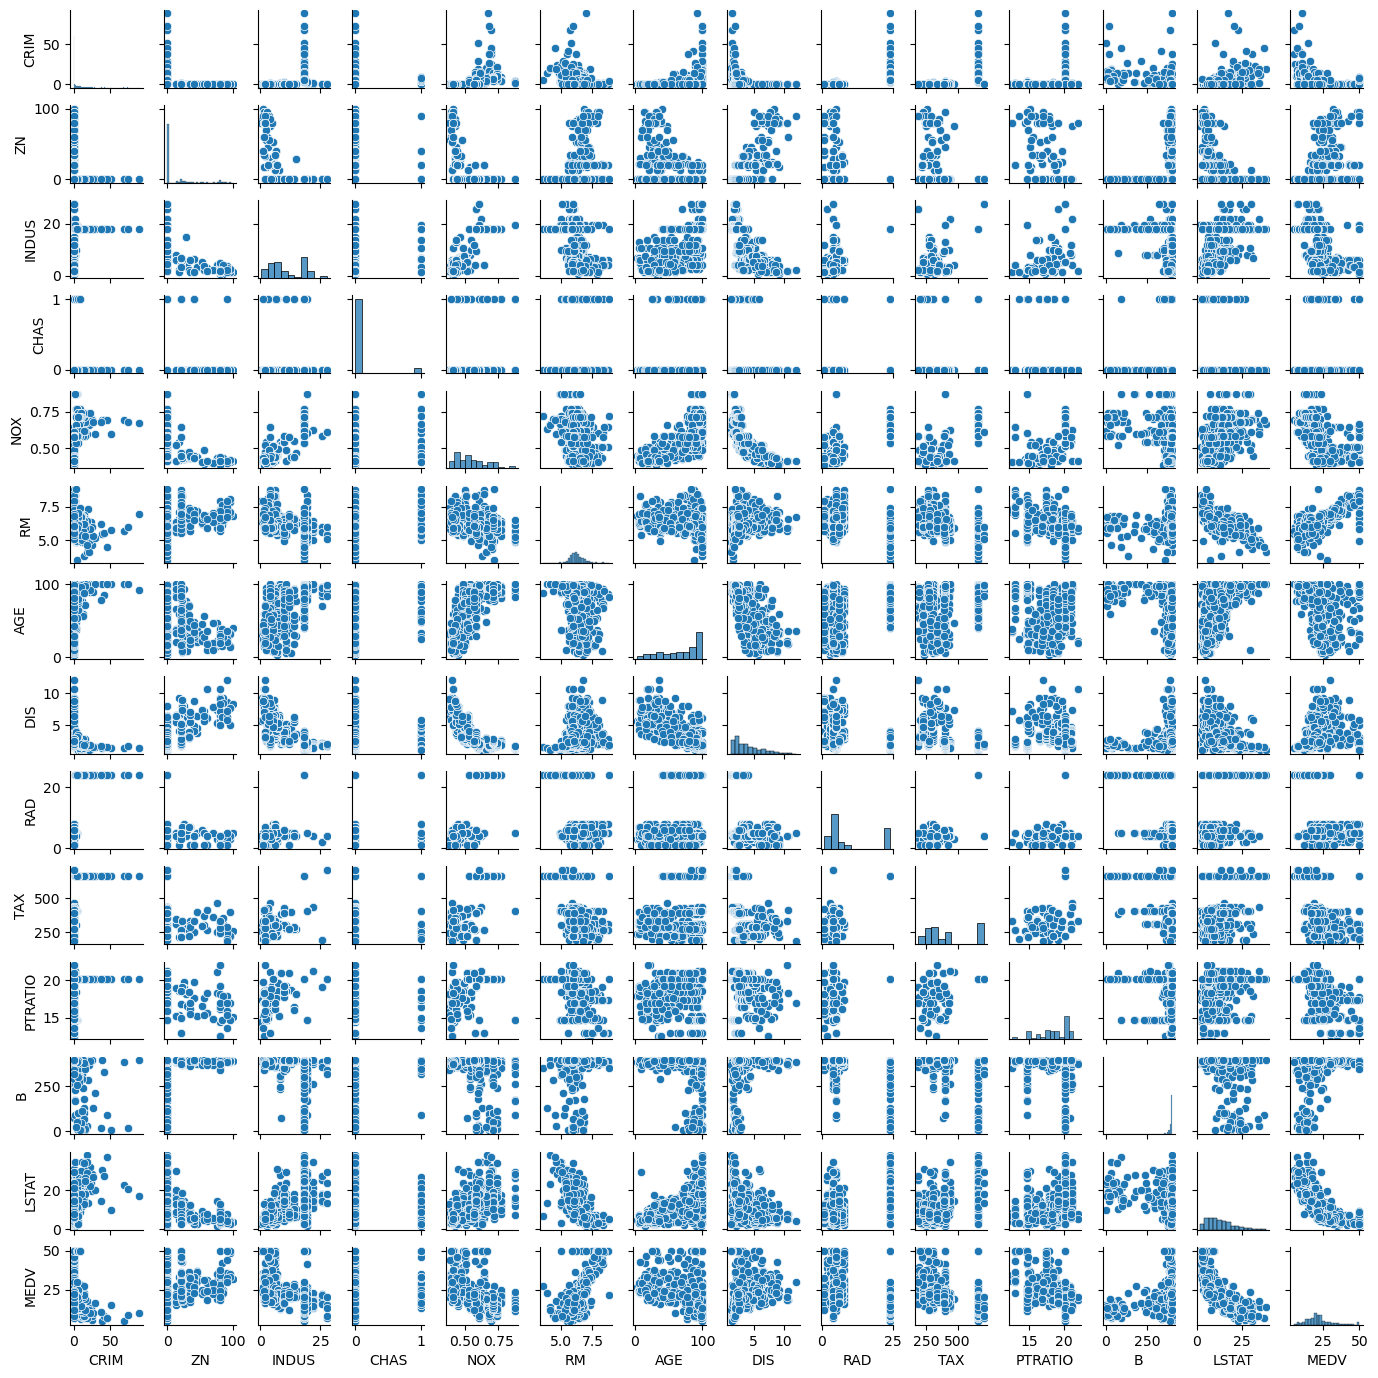

In [7]:
#Dsitribucion y Dispersion
sns.pairplot(df,height=1)
#plt.tight_layout()

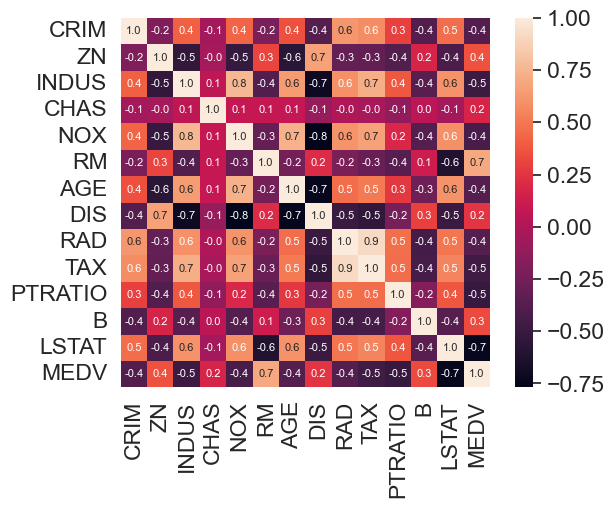

In [8]:
cm=np.corrcoef(df.values.T)
sns.set_theme(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.1f',annot_kws={'size':8},
               yticklabels=cols, xticklabels=cols)

In [9]:
def lin_regplot(X,y,model):
    plt.scatter(X,y, c='steelblue',edgecolors='white', s=70)
    plt.plot(X,model.predict(X),color='black',lw=2)
    return None

In [10]:
X=df['RM'].values
y=df['MEDV'].values
Xr=X.reshape(-1,1)


In [11]:
slr = LinearRegression()
slr.fit(Xr,y)
print(slr.coef_[0])
print(slr.intercept_)

9.10210898118031
-34.67062077643857


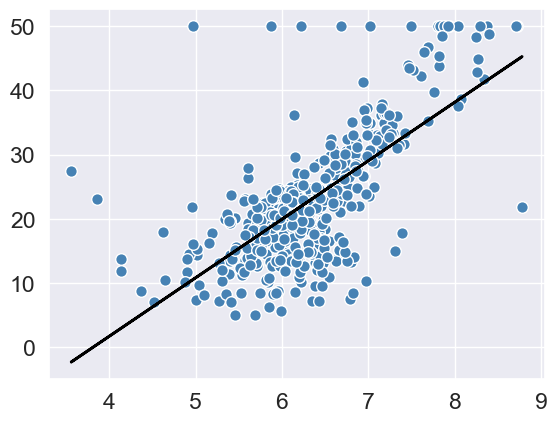

In [12]:
lin_regplot(Xr,y,slr)

In [13]:
from sklearn.linear_model import RANSACRegressor
ransac= RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50,
                        loss='absolute_error',
                        residual_threshold=5.0,
                        random_state=0)
ransac.fit(Xr,y)

RANSACRegressor(estimator=LinearRegression(), min_samples=50, random_state=0,
                residual_threshold=5.0)

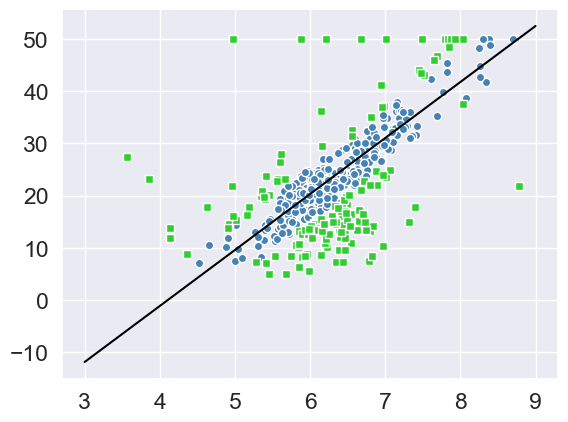

In [14]:
inlier_m= ransac.inlier_mask_
outlier_m =np.logical_not(inlier_m)
line_X = np.arange(3,10,1)
line_y_ransac=ransac.predict(line_X[:,np.newaxis])
plt.scatter(Xr[inlier_m],y[inlier_m],marker='o', c='steelblue', label='Inliers',edgecolors='white')
plt.scatter(Xr[outlier_m],y[outlier_m],marker='s',c='limegreen', label='Outlier', edgecolors='white')
plt.plot(line_X,line_y_ransac,color='black')

In [15]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1].values
y=df['MEDV']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)
slr=LinearRegression()
slr.fit(X,y)
y_train_p=slr.predict(X_train)
y_test_p=slr.predict(X_test)

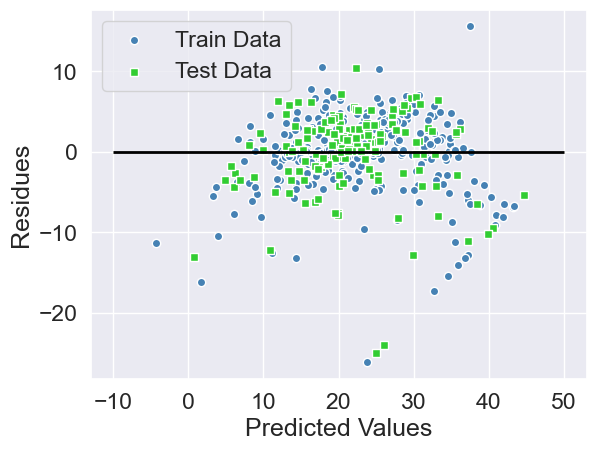

In [16]:
plt.scatter(y_train_p,y_train_p-y_train,c='steelblue',marker='o',edgecolors='white',label='Train Data')
plt.scatter(y_test_p,y_test_p-y_test,marker='s',c='limegreen',edgecolors='white',label='Test Data')
plt.legend(loc='upper left')
plt.xlabel('Predicted Values')
plt.ylabel('Residues')
plt.hlines(y=0,xmin=-10,xmax=50,colors='black', lw=2)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
print("train: ",mean_squared_error(y_train,y_train_p))
print("test: ",mean_squared_error(y_test,y_test_p))

train:  20.19957057658601
test:  25.843003906865327


In [18]:
print("train: ",r2_score(y_train,y_train_p))
print("test: ",r2_score(y_test,y_test_p))

train:  0.7616977936911362
test:  0.6896313191370913


# Metodos Regularizados para Regresion

In [19]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

r=Ridge(alpha=1.0)
l=Lasso(alpha=1.0)
E=ElasticNet(alpha=1.0,l1_ratio=0.05) # si l1 es igual a 1, es igual a lasso

# Regresion Lineal en una curva: Polinomial

In [21]:
from sklearn.preprocessing import PolynomialFeatures
X = df['LSTAT'].values
Xl = X.reshape(-1,1)

In [22]:
#Regression

reg = LinearRegression()

#quadratic
q=PolynomialFeatures(degree=2)
c=PolynomialFeatures(degree=3)

Xq=q.fit_transform(Xl)
Xc=c.fit_transform(Xl)


In [24]:
X_fit = np.arange(Xl.min(),Xl.max(),1)[:,np.newaxis]

regr=reg.fit(Xl,y)
y_lin_fit = reg.predict(X_fit)
linear_r2 = r2_score(y,regr.predict(Xl))

regr=reg.fit(Xq,y)
y_quad_fit=reg.predict(q.fit_transform(X_fit))
quad_r2=r2_score(y,regr.predict(Xq))

regr=reg.fit(Xc,y)
y_cubic_fit=reg.predict(c.fit_transform(X_fit))
cubic_r2=r2_score(y,regr.predict(Xc))


Text(0, 0.5, 'MEDV')

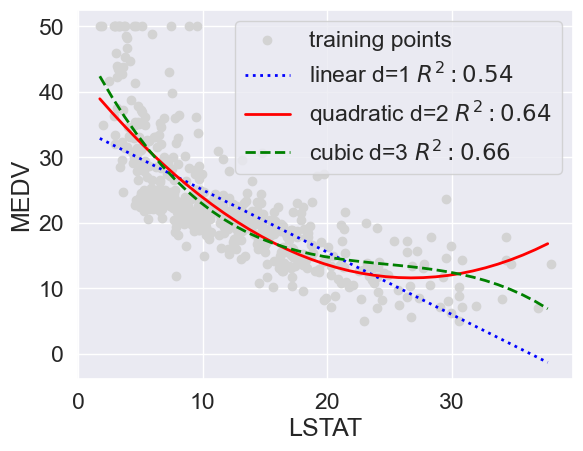

In [33]:
plt.scatter(Xl,y, label='training points', c='lightgray')
plt.plot(X_fit,y_lin_fit,label='linear d=1 $R^2:%.2f$ '%linear_r2, c='blue',lw=2,linestyle=':')

plt.plot(X_fit,y_quad_fit,label='quadratic d=2 $R^2:%.2f$ '%quad_r2,c='red',lw=2,linestyle='-')

plt.plot(X_fit,y_cubic_fit,label='cubic d=3 $R^2:%.2f$ '%cubic_r2,c='green',lw=2,linestyle='--')
plt.legend(loc='upper right')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')